In [1]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import PIL
from scipy.ndimage import gaussian_filter

from pathlib import Path
import sys
sys.path.append(str(Path(__session__).parent.parent))

In [73]:
from utils import *
from detect import *
from scipy.ndimage import distance_transform_edt
from skimage.morphology import medial_axis, skeletonize
import matplotlib.pyplot as plt
import math

In [3]:
db = SalamandraDB(load_images=True)

In [4]:
salamandras = db.content
salamandra = salamandras['0']

In [8]:
pct=20
scale_factor=1.
centers = [spot_center(spot) for spot in salamandra.spots]
dd = np.array([[dist(p0, p1) for p0 in centers] for p1 in centers])
dd /= np.percentile(dd, pct)
close = (dd > 0) & (dd <= scale_factor)
nbh = {}
for i, center in enumerate(centers):
    nbh_idx = [int(x) for x in np.flatnonzero(close[i, :])]
    dst = [float(dd[i, j]) for j in nbh_idx]
    angles = [angle_to_x_axis(center, centers[j]) for j in nbh_idx]
    srt = np.argsort(dst)
    nbh[i] = [(nbh_idx[j], dst[j], angles[j]) for j in srt]
    # angles = {i: sorted([float(dd[i, j]) for j in nbs]) for i, nbs in nbh.items()}

In [94]:
spot = salamandra.spots[0]
mask = spot.detection.mask
mask_barycenter_distance_quantile_area_ratio(mask, np.arange(0., 1., .1))

(array([ 0.34083691,  3.73195572,  5.18552818,  6.35191784,  7.37308073,
         8.22724724,  9.10377846, 10.10025043, 11.15493259, 12.37640247]),
 [np.float64(1.77795316548718),
  np.float64(1.0067335245218703),
  np.float64(1.003817677774255),
  np.float64(0.9321645174085482),
  np.float64(0.8226297621792307),
  np.float64(0.7379621080558864),
  np.float64(0.6527365750404136),
  np.float64(0.5612902801800126),
  np.float64(0.4655728159689207),
  np.float64(0.37820970380722896)])

In [93]:
cov.sum() /  ()

np.float32(292.8288)

In [86]:
PIL.Image.fromarray((255 / cov.max() * cov).astype('uint8'))

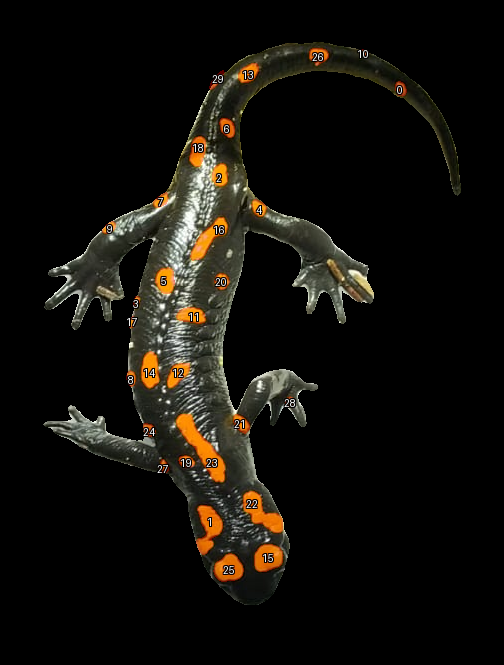

In [75]:
PIL.Image.fromarray(overlay_spot_masks_with_numbers(np.array(salamandras['1'].body.detection.masked_image),  salamandras['1'].spots))

In [21]:
r = LOOKUP_RADIUS_FACTOR * scale
a_range = ANGLE_LOOKUP_RANGE
pp = trace_ridges(skel, skel_thin, r, a_range, R1_MUL * 4, A_RANGE_MUL * 2)
b = bezier_from_polyline(pp)

In [150]:
deep = dist * (dist >= scale)
deep_ridge = ridge_from_distance(deep)
r = LOOKUP_RADIUS_FACTOR * scale
a_range = ANGLE_LOOKUP_RANGE
pp = trace_ridges(ridge, deep_ridge, r, a_range, R1_MUL * 4, A_RANGE_MUL * 2)
b = bezier_from_polyline(pp)

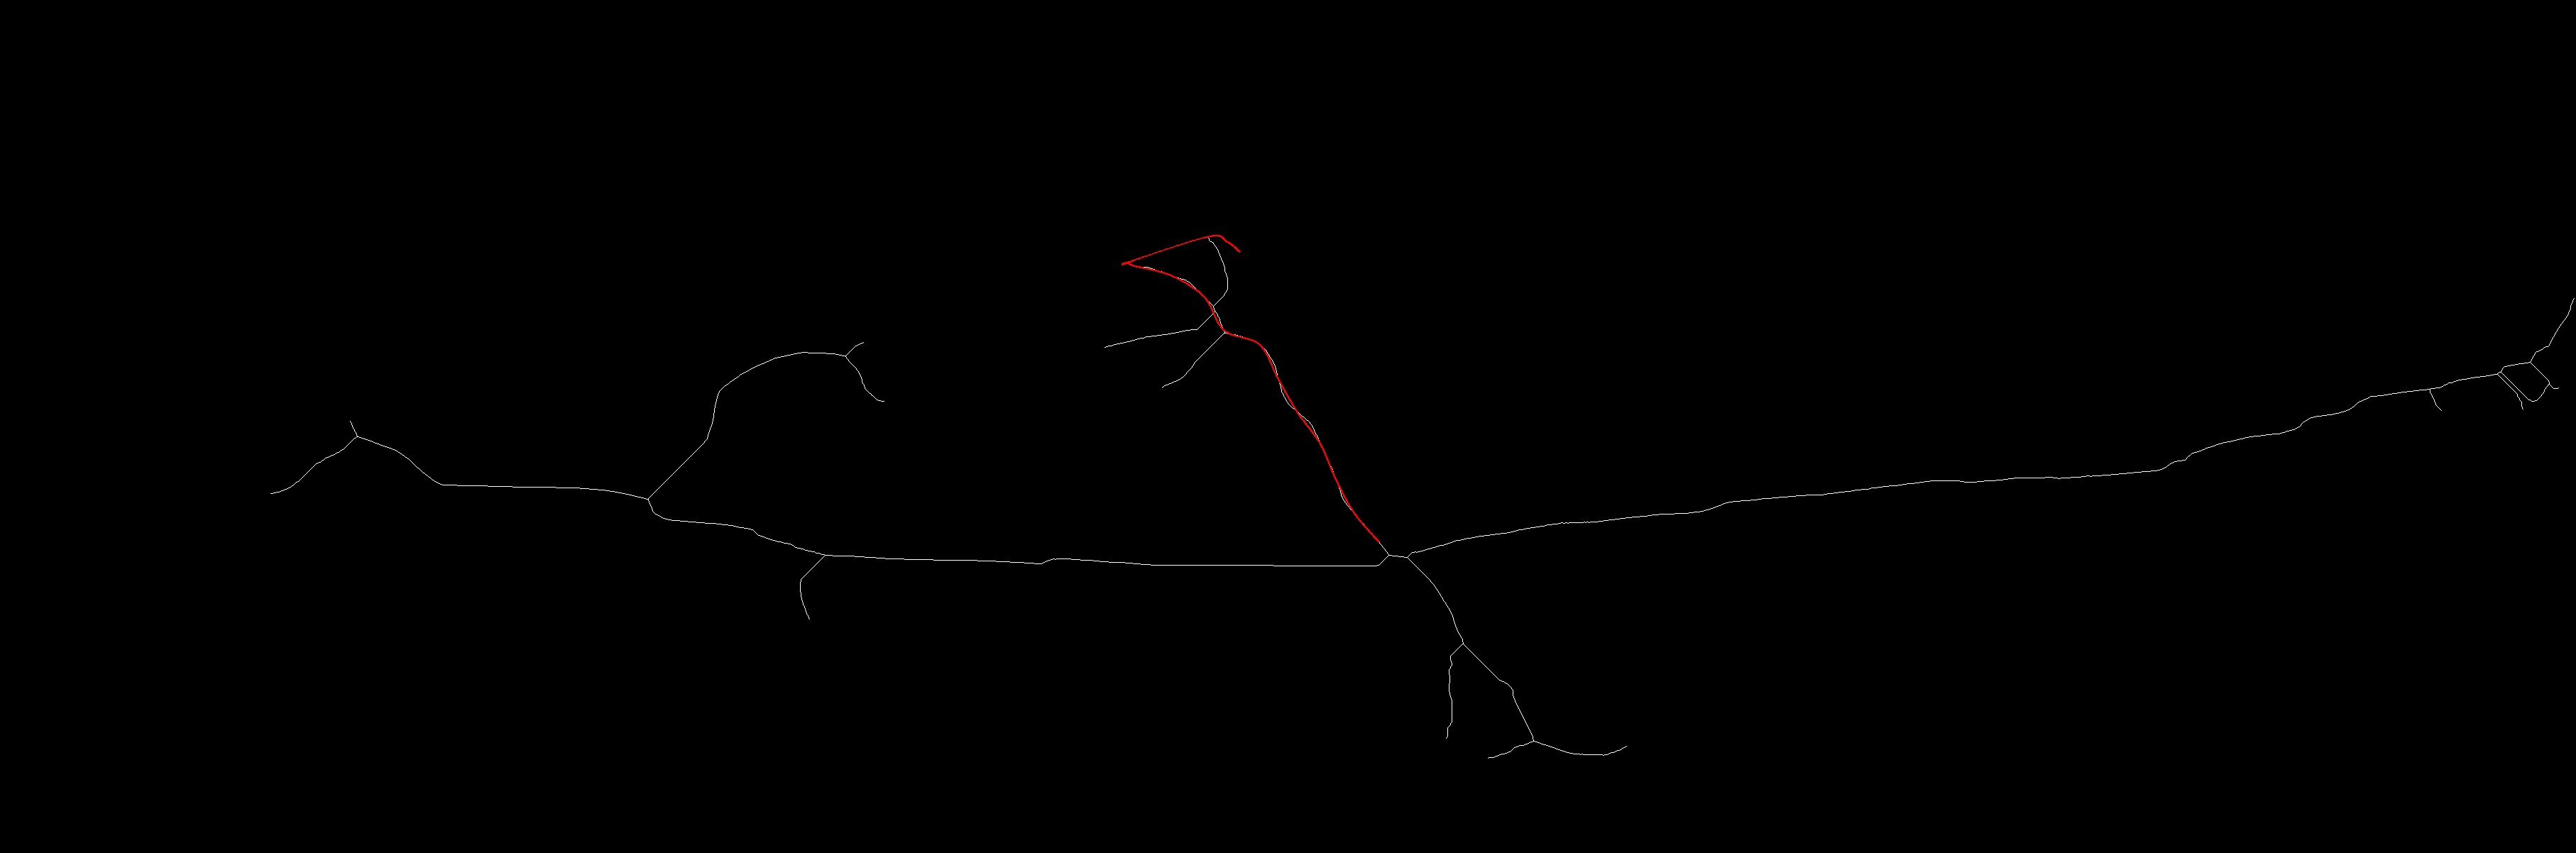

In [23]:
PIL.Image.fromarray(draw_bezier(skel_thin, b))

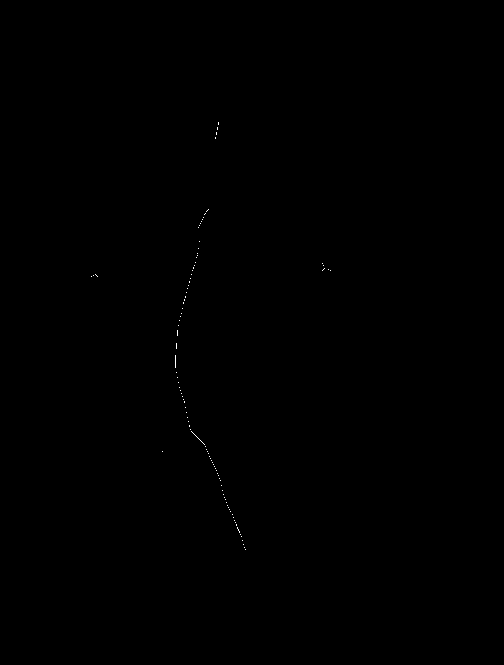

In [152]:
scale1 = np.quantile(dist[dist > 0], .7)
mid = dist * (dist >= scale1)
show_monochrome(ridge_from_distance(mid))